In [1]:
# @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='d0830f2a-27d9-467c-bfa1-685ad3a3c790', project_access_token='p-2c7d5c628291fcf822a30cdb398bb065dd1ab0e0')
pc = project.project_context


In [2]:
import types
from botocore.client import Config
import ibm_boto3
import requests 
import pandas as pd
import numpy as np
import random 

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix

import itertools

import matplotlib.pyplot as plt

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

def __iter__(self): return 0

# @hidden_cell
client_8a19d847484a484a95d56b752d1a1d1c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MWgNox1_f5qrzFRANUxjSVENF1sSLETB5EJwUSpV6h_d',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_8a19d847484a484a95d56b752d1a1d1c.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-xxxxkdizpev2fp',Key='Data.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [8]:
body = client_8a19d847484a484a95d56b752d1a1d1c.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-xxxxkdizpev2fp',Key='Data.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

#import store addresses and revenue category
store_data = pd.read_csv(body)

store_data.head()

,Store,Address,ZIP,City,Group
0,F101,Elberfelder Str. 86,40822,Mettmann,1
1,F102,Frankfurter Str. 243C,38122,Braunschweig,0
2,F103,Fallerslebener Str. 2,38518,Gifhorn,0
3,F104,Hafelsstr. 237,47809,Krefeld,1
4,F105,Hasporter Damm 110,27749,Delmenhorst,0


In [9]:
#combinate city and address to one field
store_data['StoreAddress'] = store_data['Address'] + "," + store_data['City']

store_data.head()

,Store,Address,ZIP,City,Group,StoreAddress
0,F101,Elberfelder Str. 86,40822,Mettmann,1,"Elberfelder Str. 86, Mettmann"
1,F102,Frankfurter Str. 243C,38122,Braunschweig,0,"Frankfurter Str. 243C, Braunschweig"
2,F103,Fallerslebener Str. 2,38518,Gifhorn,0,"Fallerslebener Str. 2, Gifhorn"
3,F104,Hafelsstr. 237,47809,Krefeld,1,"Hafelsstr. 237, Krefeld"
4,F105,Hasporter Damm 110,27749,Delmenhorst,0,"Hasporter Damm 110, Delmenhorst"


In [10]:
#initialize fields for latitude and longitude
store_data['latitude'] = 0
store_data['longitude'] = 0

for index, row in store_data.iterrows():
    if store_data.loc[index, 'latitude'] == 0:
        geolocator = Nominatim(user_agent="store_explorer")
        location = geolocator.geocode(row['StoreAddress'])
        x = location.latitude
        y = location.longitude    
    
        store_data.loc[index, 'latitude'] = x
        store_data.loc[index, 'longitude'] = y  

In [11]:
store_data.head()

,Store,Address,ZIP,City,Group,StoreAddress,latitude,longitude
0,F101,Elberfelder Str. 86,40822,Mettmann,1,"Elberfelder Str. 86, Mettmann",51.248775,6.989703
1,F102,Frankfurter Str. 243C,38122,Braunschweig,0,"Frankfurter Str. 243C, Braunschweig",52.247049,10.510379
2,F103,Fallerslebener Str. 2,38518,Gifhorn,0,"Fallerslebener Str. 2, Gifhorn",52.481839,10.545415
3,F104,Hafelsstr. 237,47809,Krefeld,1,"Hafelsstr. 237, Krefeld",51.321655,6.604901
4,F105,Hasporter Damm 110,27749,Delmenhorst,0,"Hasporter Damm 110, Delmenhorst",53.037767,8.645715


In [12]:
#print a map with Kassel as a center (central city in Germany)

address = 'Kassel'

geolocator = Nominatim(user_agent="germany_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Germany using latitude and longitude values
map_germany = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map
for lat, lng, store in zip(store_data['latitude'], store_data['longitude'], store_data['Store']):
    label = '{}'.format(store)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_germany)  
    
map_germany

In [13]:
CLIENT_ID = 'ZVUXW4ABCGDTKC4GKWBC4KSSD3PQBD10XT5OBYGHM00IZMYU' 
CLIENT_SECRET = 'YHZHTDWOHSRYMNTDEDXNZSME04CSPO54IFS4RZUXYVTH4OHD' 
VERSION = '20180604'
LIMIT = 100

In [19]:
#initialize count columns
store_data['count_stables'] = 0
store_data['count_clubs'] = 0
store_data['count_schools'] = 0
store_data['count_competition'] = 0

#find stables in surrounding area (20 km)
search_query = 'Reitstall'
radius = 20000

#for each store find stables
for index, row in store_data.iterrows():
        latitude = store_data.loc[index, 'latitude']
        longitude = store_data.loc[index, 'longitude']
        
        #build url
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
        #retrieve results
        results = requests.get(url).json()
        
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        
        #count results
        count = len(dataframe.index)
        
        #assign count to store
        store_data.loc[index, 'count_stables'] = count
        
#find schools in surrounding area (20 km)
search_query = 'Reitschule'
radius = 20000

#for each store find stables
for index, row in store_data.iterrows():
        latitude = store_data.loc[index, 'latitude']
        longitude = store_data.loc[index, 'longitude']
        
        #build url
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
        #retrieve results
        results = requests.get(url).json()
        
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        
        #count results
        count = len(dataframe.index)
        
        #assign count to store
        store_data.loc[index, 'count_schools'] = count
        
#find clubs in surrounding area (20 km)
search_query = 'Reitverein'
radius = 20000

#for each store find stables
for index, row in store_data.iterrows():
        latitude = store_data.loc[index, 'latitude']
        longitude = store_data.loc[index, 'longitude']
        
        #build url
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
        #retrieve results
        results = requests.get(url).json()
        
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        
        #count results
        count = len(dataframe.index)
        
        #assign count to store
        store_data.loc[index, 'count_clubs'] = count
        
#find competition in surrounding area (20 km)
search_query = 'Reitsport Geschäft'
radius = 20000

#for each store find stables
for index, row in store_data.iterrows():
        latitude = store_data.loc[index, 'latitude']
        longitude = store_data.loc[index, 'longitude']
        
        #build url
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
        #retrieve results
        results = requests.get(url).json()
        
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        
        #count results
        count = len(dataframe.index)
        
        #assign count - 1 (-1 because own store is included in result) to store 
        store_data.loc[index, 'count_competition'] = max(0, count - 1)

In [39]:
store_data.head(5)

,Store,Address,ZIP,City,Group,StoreAddress,latitude,longitude,count_stables,count_clubs,count_schools,count_competition
0,F101,Elberfelder Str. 86,40822,Mettmann,1,"Elberfelder Str. 86, Mettmann",51.248775,6.989703,25,6,7,49
1,F102,Frankfurter Str. 243C,38122,Braunschweig,0,"Frankfurter Str. 243C, Braunschweig",52.247049,10.510379,4,1,0,39
2,F103,Fallerslebener Str. 2,38518,Gifhorn,0,"Fallerslebener Str. 2, Gifhorn",52.481839,10.545415,2,2,0,40
3,F104,Hafelsstr. 237,47809,Krefeld,1,"Hafelsstr. 237, Krefeld",51.321655,6.604901,22,2,7,49
4,F105,Hasporter Damm 110,27749,Delmenhorst,0,"Hasporter Damm 110, Delmenhorst",53.037767,8.645715,2,1,0,22


In [21]:
#Sample "1"
latitude = 51.321655
longitude = 6.604901

#find stables in surrounding area (20 km)
search_query = 'Reitstall'
radius = 20000
      
#build url
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
#retrieve results
results = requests.get(url).json()
        
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_stables = json_normalize(venues)

# clean column names by keeping only last term
df_stables.columns = [column.split('.')[-1] for column in df_stables.columns]


#find clubs in surrounding area (20 km)
search_query = 'Reitverein'
radius = 20000
      
#build url
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
#retrieve results
results = requests.get(url).json()
        
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_clubs = json_normalize(venues)

# clean column names by keeping only last term
df_clubs.columns = [column.split('.')[-1] for column in df_clubs.columns]


#find schools in surrounding area (20 km)
search_query = 'Reitschule'
radius = 20000
      
#build url
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
#retrieve results
results = requests.get(url).json()
        
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_schools = json_normalize(venues)

# clean column names by keeping only last term
df_schools.columns = [column.split('.')[-1] for column in df_schools.columns]


#find competition in surrounding area (20 km)
search_query = 'Reitsport Geschäft'
radius = 20000
      
#build url
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
#retrieve results
results = requests.get(url).json()
        
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_competition = json_normalize(venues)

# clean column names by keeping only last term
df_competition.columns = [column.split('.')[-1] for column in df_competition.columns]

In [23]:
#show map
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around the store

# add a red circle marker to represent the store
folium.features.Marker(
    [latitude, longitude],
    popup='Store Group 1'
).add_to(venues_map)

# add the stables
for lat, lng in zip(df_stables.lat, df_stables.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# add the schools
for lat, lng in zip(df_schools.lat, df_schools.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map)

# add the clubs
for lat, lng in zip(df_clubs.lat, df_clubs.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)    


# add the competition
for lat, lng in zip(df_competition.lat, df_competition.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# display map
venues_map

In [40]:
#Sample "0"
latitude = 50.145710
longitude = 8.935325

#find stables in surrounding area (20 km)
search_query = 'Reitstall'
radius = 20000
      
#build url
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
#retrieve results
results = requests.get(url).json()
        
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_stables = json_normalize(venues)

# clean column names by keeping only last term
df_stables.columns = [column.split('.')[-1] for column in df_stables.columns]


#find clubs in surrounding area (20 km)
search_query = 'Reitverein'
radius = 20000
      
#build url
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
#retrieve results
results = requests.get(url).json()
        
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_clubs = json_normalize(venues)

# clean column names by keeping only last term
df_clubs.columns = [column.split('.')[-1] for column in df_clubs.columns]


#find schools in surrounding area (20 km)
search_query = 'Reitschule'
radius = 20000
      
#build url
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
#retrieve results
results = requests.get(url).json()
        
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_schools = json_normalize(venues)

# clean column names by keeping only last term
df_schools.columns = [column.split('.')[-1] for column in df_schools.columns]


#find competition in surrounding area (20 km)
search_query = 'Reitsport Geschäft'
radius = 20000
      
#build url
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
#retrieve results
results = requests.get(url).json()
        
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
df_competition = json_normalize(venues)

# clean column names by keeping only last term
df_competition.columns = [column.split('.')[-1] for column in df_competition.columns]

In [41]:
#show map sample "0"
venues_map = folium.Map(location=[latitude, longitude], zoom_start=11) # generate map centred around the store

# add a red circle marker to represent the store
folium.features.Marker(
    [latitude, longitude],
    popup='Store Group 0'
).add_to(venues_map)

# add the stables
for lat, lng in zip(df_stables.lat, df_stables.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

# add the schools
for lat, lng in zip(df_schools.lat, df_schools.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='orange',
        fill = True,
        fill_color='orange',
        fill_opacity=0.6
    ).add_to(venues_map)

# add the clubs
for lat, lng in zip(df_clubs.lat, df_clubs.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='green',
        fill = True,
        fill_color='green',
        fill_opacity=0.6
    ).add_to(venues_map)    


# add the competition
for lat, lng in zip(df_competition.lat, df_competition.lng):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='red',
        fill = True,
        fill_color='red',
        fill_opacity=0.6
    ).add_to(venues_map)
    
# display map
venues_map

In [42]:
#define Features
X = np.asarray(store_data[['count_stables', 'count_clubs', 'count_schools', 'count_competition']])

In [43]:
#define Target
y = np.asarray(store_data['Group'])

In [44]:
#split training and test dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

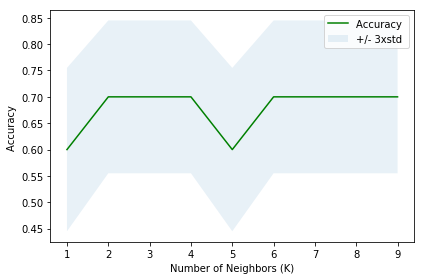

Train set Accuracy:  0.648648648649
Test set Accuracy:  0.7
The best accuracy was with 0.7 with k= 2


In [45]:
#K Nearest Neighbor(KNN)

#calculate the accuracy for different Ks

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
#plot model accuracy for different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
#select best K setting
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [46]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_knn = neigh.predict(X_test)
yhat_knn[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
# logistic regression

#Train Model and Predict  
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
yhat_prob_lr = LR.predict_proba(X_test)
yhat[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [48]:
# Decision Tree

#Train Model and Predict
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree.fit(X_train,y_train)

yhat_dt = DTree.predict(X_test)
yhat_dt[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [49]:
#Support Vector Machine

#Train Model and Predict
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

yhat_svm = clf.predict(X_test)
yhat_svm [0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.70      1.00      0.82         7
          1       0.00      0.00      0.00         3

avg / total       0.49      0.70      0.58        10

Confusion matrix, without normalization
[[7 0]
 [3 0]]


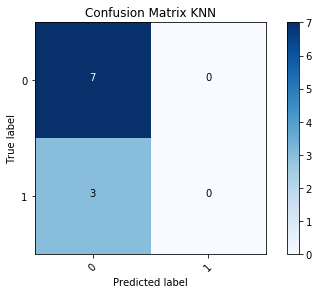

In [51]:
#Metrics and Confusion Matrix KNN
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_knn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion Matrix KNN')

/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.70      1.00      0.82         7
          1       0.00      0.00      0.00         3

avg / total       0.49      0.70      0.58        10

Confusion matrix, without normalization
[[7 0]
 [3 0]]


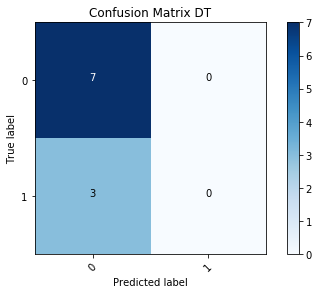

In [52]:
#Metrics and Confusion Matrix DT
cnf_matrix = confusion_matrix(y_test, yhat_dt, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_dt))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion Matrix DT')

In [53]:
jaccard_similarity_score(y_test, yhat_lr)

0.90000000000000002

             precision    recall  f1-score   support

          0       0.88      1.00      0.93         7
          1       1.00      0.67      0.80         3

avg / total       0.91      0.90      0.89        10

Confusion matrix, without normalization
[[7 0]
 [1 2]]


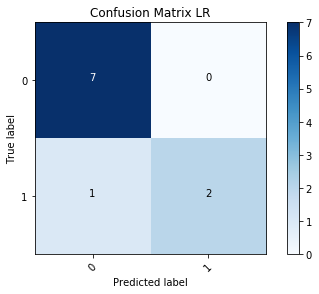

In [54]:
#Metrics and Confusion Matrix LR
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_lr))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion Matrix LR')

             precision    recall  f1-score   support

          0       0.70      1.00      0.82         7
          1       0.00      0.00      0.00         3

avg / total       0.49      0.70      0.58        10

Confusion matrix, without normalization
[[7 0]
 [3 0]]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


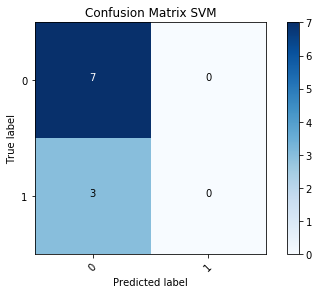

In [142]:
#Metrics and Confusion Matrix SVM
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion Matrix SVM')

In [143]:
log_loss(y_test, yhat_prob_lr)

0.44706033185054928